In [1]:

import pandas as pd

In [2]:
df1 = pd.read_csv("C:/Users/KHUSH/Downloads/IFND.csv", encoding = ('ISO-8859-1'))
df2 = pd.read_csv("C:/Users/KHUSH/Downloads/news_dataset.csv")
df3 = pd.read_csv("C:/Users/KHUSH/Downloads/New folder/train.csv", on_bad_lines='skip')

In [3]:
df4 = df1.drop(df1.columns[[0, 2, 3, 4, 5]], axis = 1)
cols = list(df4.columns)
cols[0], cols[1] = cols[1], cols[0]
df4 = df4[cols]


In [4]:
df4.columns = ['label', 'text']
df4['label'] = df4['label'].replace({'TRUE': 'REAL', 'Fake': 'FAKE'})

In [5]:
df2.head()

,label,text
0,REAL,Payal has accused filmmaker Anurag Kashyap of ...
1,FAKE,A four-minute-long video of a woman criticisin...
2,FAKE,"Republic Poll, a fake Twitter account imitatin..."
3,REAL,"Delhi teen finds place on UN green list, turns..."
4,REAL,Delhi: A high-level meeting underway at reside...


In [6]:
df3['false'].unique()

array(['half-true', 'mostly-true', 'false', 'true', 'barely-true',
       'pants-fire'], dtype=object)

In [7]:
df5 = df3.drop(df3.columns[[0, 3, 4, 5,6,7,8,9,10,11,12,13]], axis = 1)
df5.columns = ['label', 'text']
df5['label'] = df5['label'].replace({'true': 'REAL', 'false': 'FAKE', 'mostly-true': 'REAL', 'pants-fire' : 'FAKE', 'barely-true' : 'FAKE'})
labels_to_remove = ['half-true']
df5 = df5[ ~df5['label'].isin(labels_to_remove)]

In [8]:
df5['label'].unique()

array(['REAL', 'FAKE'], dtype=object)

In [9]:
print(df4.isnull().sum())
print(df5.isnull().sum())

df2.dropna(inplace = True)
print(df2.isnull().sum())

label    0
text     0
dtype: int64
label    0
text     0
dtype: int64
label    0
text     0
dtype: int64


In [10]:
df2 = df2.drop_duplicates(keep='first')

In [11]:
df2.describe()

,label,text
count,2229,2229
unique,2,2229
top,FAKE,Payal has accused filmmaker Anurag Kashyap of ...
freq,1851,1


In [12]:
df2.to_excel("D:/Fake News Detection/df2_unique.xlsx", index = False)

In [13]:
df4 = df4.drop_duplicates(keep='first')

In [14]:
df4.describe()

,label,text
count,56703,56703
unique,2,56340
top,REAL,Bihar election battle gets personal as Lalu da...
freq,37800,2


In [15]:
df4.to_excel("D:/Fake News Detection/df1_unique.xlsx", index = False)

In [16]:
df5 = df5.drop_duplicates(keep='first')

In [17]:
df5.describe()
df5.to_excel("D:/Fake News Detection/df3_unique.xlsx", index = False)

In [18]:
merged_df = pd.concat([df2,df4,df5],axis = 0)
merged_df.describe()
merged_df.to_excel("D:/Fake News Detection/merged_df.xlsx", index = False)

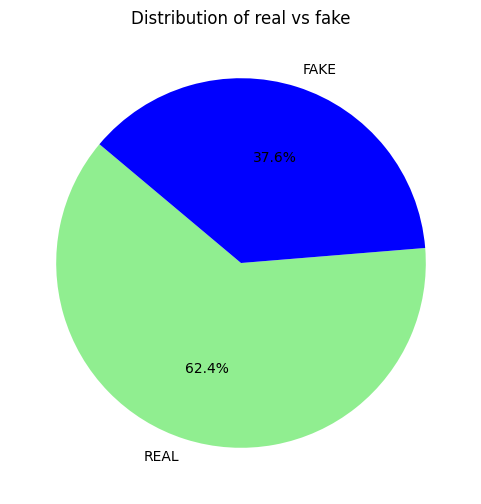

In [19]:
import matplotlib.pyplot as plt
label_counts = merged_df['label'].value_counts() 
plt.figure(figsize=(6,6))
plt.pie(label_counts, labels=label_counts.index, autopct='%1.1f%%', startangle= 140, colors=['lightgreen','blue'])
plt.title('Distribution of real vs fake')
plt.show()



In [20]:
# import nltk 
# from nltk.corpus import stopwords
# from nltk.tokenize import word_tokenize
# from nltk.stem import PorterStemmer
# def preprocess_text(text):
#     text = text.lower()
#     words = word_tokenize(text)
#     stop_words = set(stopwords.words('english'))
#     words = [word for word in words if word in stop_words]
#     ps= PorterStemmer()
#     words=[ps.stem(word) for word in words]
#     return  ' '.join(words)
# merged_df['processed_text'] = merged_df['text'].apply(preprocess_text)



In [21]:
# merged_df[['processed_text']].to_csv('processed_text_only.csv', index=False)

In [22]:
# import string

# merged_df['text'] = merged_df['processed_text'].str.lower()

# merged_df['text'] = merged_df['text'].apply(lambda x: x.translate(str.maketrans('', '', string.punctuation)))

# merged_df[['text']].to_csv('unifiedpreprocessing.csv', index=False)


In [23]:
# from sklearn.feature_extraction.text import TfidfVectorizer
# merged_df['text'] =  merged_df['text'].apply(word_tokenize)
# stop_words = set(stopwords.words('english'))
# merged_df['text'] = merged_df['text'].apply(lambda x: [word for word in x if word not in stop_words])
# merged_df['text'] = merged_df['text'].apply(lambda x: ' '.join(x))

# vectorizer = TfidfVectorizer(max_features = 5000)
# X_tfidf = vectorizer.fit_transform(merged_df['text'])

# merged_df_tfidf = pd.DataFrame(X_tfidf.toarray(), columns=vectorizer.get_feature_names_out())
# print("\nTF_idf vectorized text:\n", merged_df_tfidf.head())

In [24]:
# merged_df_tfidf.to_csv('svmandlogisticregressionpreprocess.csv', index=False)

In [28]:
df10 = pd.read_csv('svmandlogisticregressionpreprocess.csv')
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split



# Split the data
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.2, random_state=42)

# Train SVM
svm_model = SVC(kernel='linear', probability=True)
svm_model.fit(X_train, y_train)

# Predictions
svm_predictions = svm_model.predict(X_test)

NameError: name 'X_tfidf' is not defined